In [107]:
import rioxarray
from libpysal.weights import Rook, Queen, raster, WSP2W, WSP
import matplotlib.pyplot as plt
from splot import libpysal as splot
import numpy as np
import xarray as xr
import pandas as pd
import pickle
from esda.moran import Moran
from esda.geary import Geary
import itertools

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


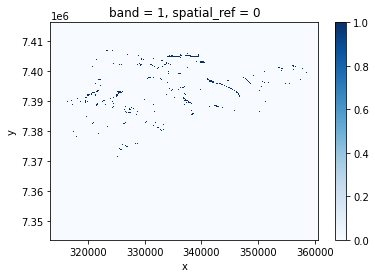

In [108]:
layer_1 = rioxarray.open_rasterio('Layers/areas_sujeitas_a_inundacao.tif')

# print('INPUT 1 - '+layer_1)
layer_1.plot(cmap='Blues')
plt.show()
plt.close()

In [109]:
# rescale do scikit-image
# https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.rescale
# perde a geolocalização (não deve ser um problema, pq essa informação não entra
# nem no GA, nem no cálculo do moran

layer_1_rescaled = rescale(layer_1, 0.10, anti_aliasing=False)

In [110]:
layer_1

<xarray.DataArray (band: 1, y: 5798, x: 3778)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3.134e+05 3.134e+05 ... 3.606e+05 3.606e+05
  * y            (y) float64 7.416e+06 7.416e+06 ... 7.344e+06 7.344e+06
    spatial_ref  int64 0
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

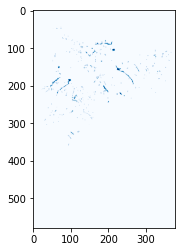

In [111]:
# precisa tirar uma dimensão para poder plotar

im = layer_1_rescaled[0,:,:]
plt.imshow(im, cmap="Blues")
plt.show()

In [146]:
# coarsen do xarray (não perde geolocalização, método exato)
# https://docs.xarray.dev/en/v0.15.1/generated/xarray.DataArray.coarsen.html
# (existe uma opção sem ser exata, mas corta as bordas ou perde dados)

layer_1_coarsen_2 = layer_1.coarsen(x=8,boundary="trim").mean().coarsen(y=8,boundary="trim").mean()

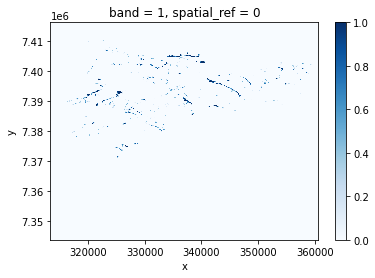

In [147]:
layer_1_coarsen_2.plot(cmap='Blues')

In [148]:
np.shape(layer_1)

(1, 5798, 3778)

In [150]:
np.shape(layer_1_coarsen_2)

(1, 724, 472)

In [151]:
layer_list = ['areas_sujeitas_a_inundacao','corticos',
              'declividade','densidade','favelas',
              'IDH','k_means','velocity','water_depth']

areas_sujeitas_a_inundacao


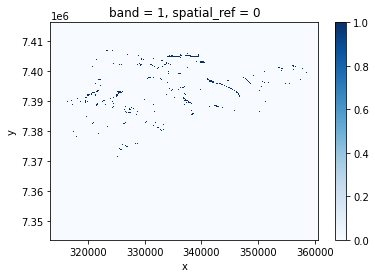

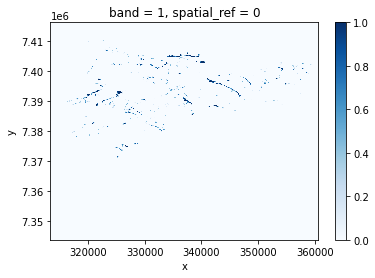

corticos


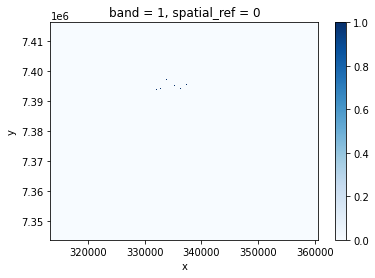

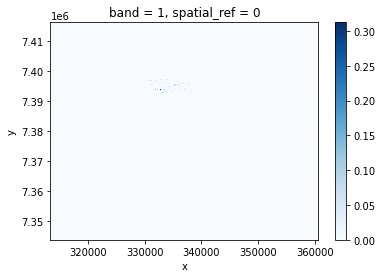

declividade


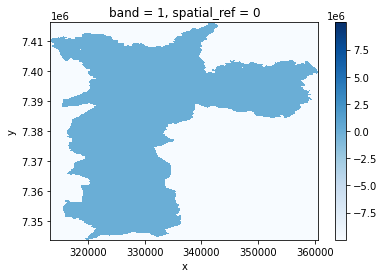

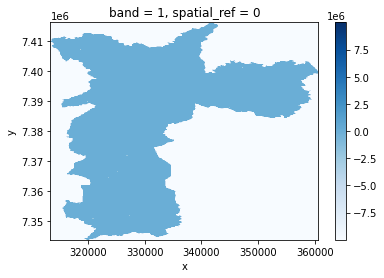

densidade


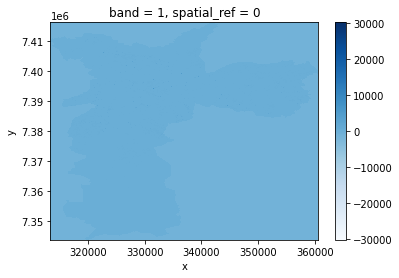

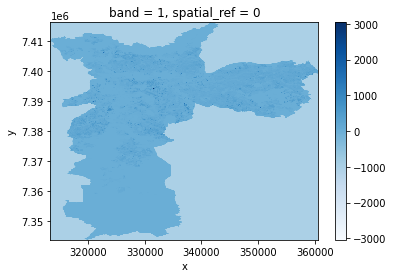

favelas


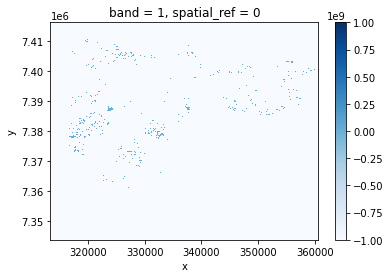

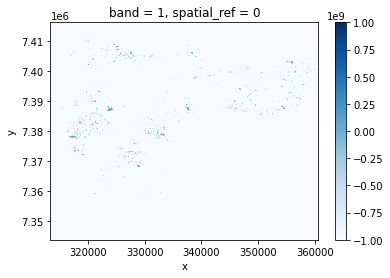

IDH


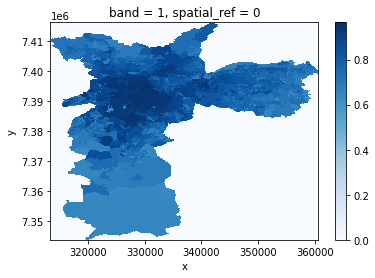

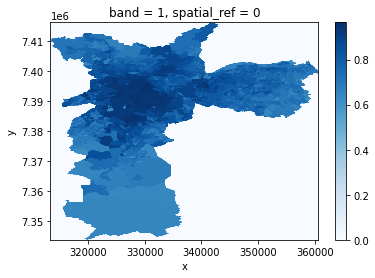

k_means


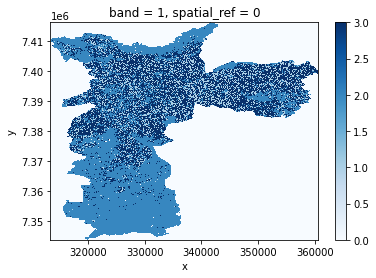

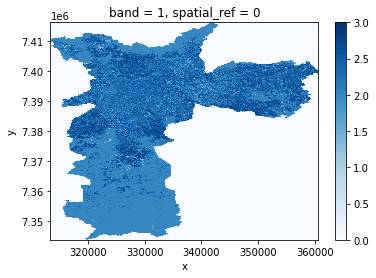

velocity


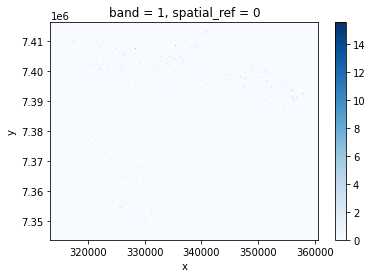

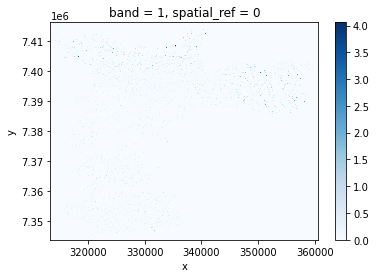

water_depth


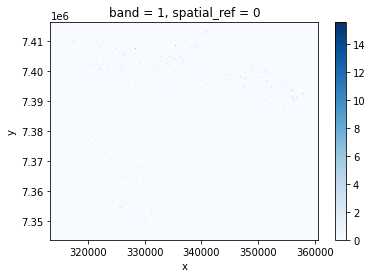

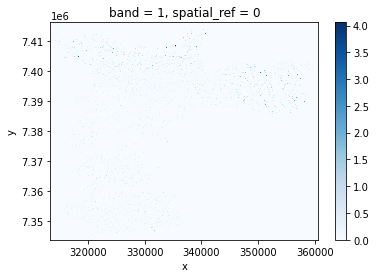

In [153]:
for layer_name in layer_list:
    print(layer_name)
    layer = rioxarray.open_rasterio('Layers/'+str(layer_name)+'.tif')
    layer.plot(cmap='Blues')    
    plt.show()
    plt.close()
    layer_coarsen = layer.coarsen(x=8,boundary="trim").mean().coarsen(y=8,boundary="trim").mean()
    layer_coarsen.plot(cmap='Blues')    
    plt.show()
    plt.close()
    layer_coarsen.rio.to_raster('Layers/coarsen_trim/8/'+str(layer_name)+'.tif')

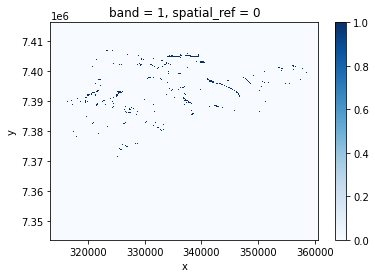

In [54]:
layer_1 = rioxarray.open_rasterio('Layers/areas_sujeitas_a_inundacao.tif')

# print('INPUT 1 - '+layer_1)
layer_1.plot(cmap='Blues')
plt.show()
plt.close()

In [72]:
from skimage.measure import block_reduce
from PIL import Image

In [69]:
layer_1_block_reduce = block_reduce(layer_1, block_size=4, func=np.mean)

(1, 1450, 945)


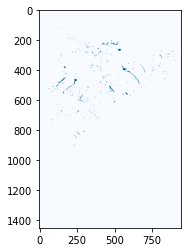

In [70]:
print(np.shape(layer_1_block_reduce))
im = layer_1_block_reduce[0,:,:]
plt.imshow(im, cmap="Blues")
plt.show()

In [92]:
layer_list = ['areas_sujeitas_a_inundacao','corticos',
              'declividade','densidade','favelas',
              'IDH','k_means','velocity','water_depth']

areas_sujeitas_a_inundacao


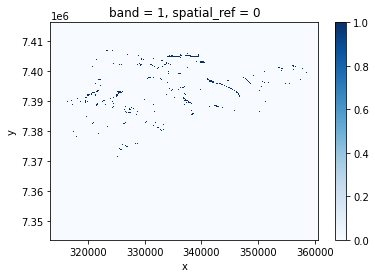

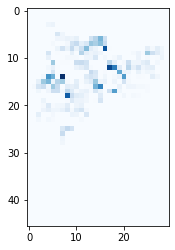

corticos


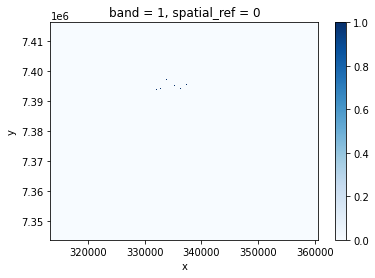

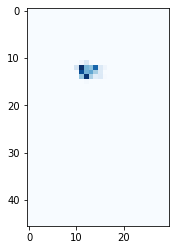

declividade


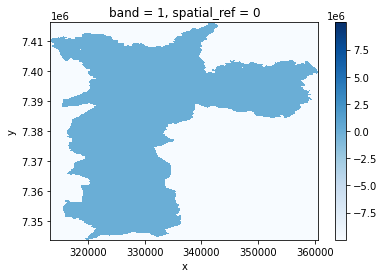

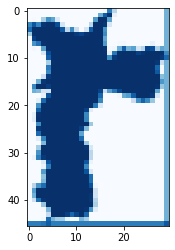

densidade


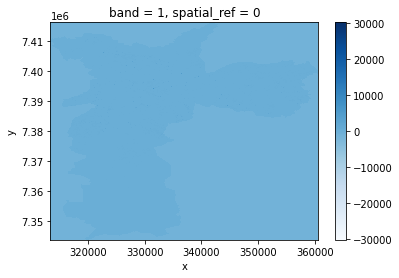

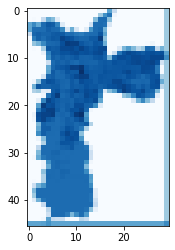

favelas


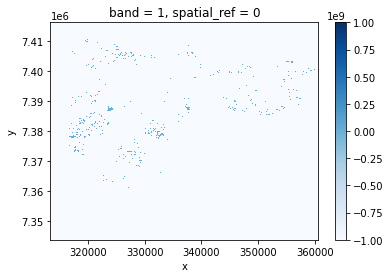

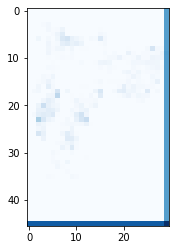

IDH


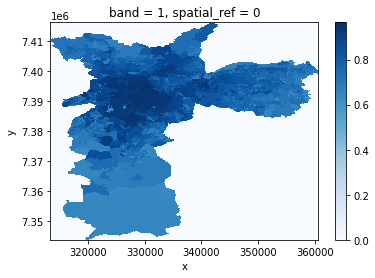

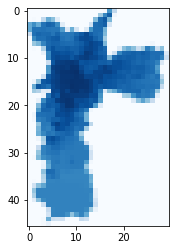

k_means


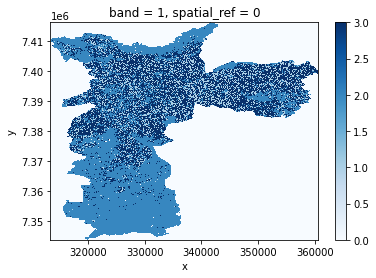

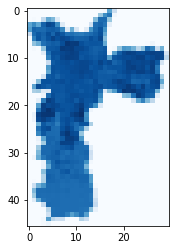

velocity


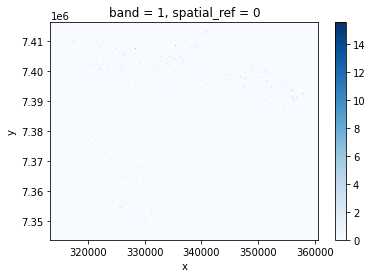

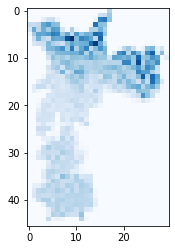

water_depth


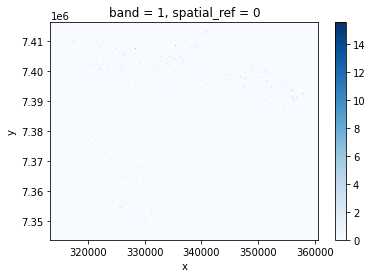

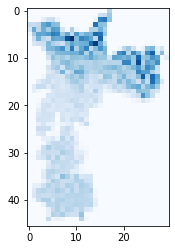

In [106]:
for layer_name in layer_list:
    print(layer_name)
    layer = rioxarray.open_rasterio('Layers/'+str(layer_name)+'.tif')
    layer.plot(cmap='Blues')    
    plt.show()
    plt.close()
    layer_block_reduce = block_reduce(layer, block_size=2, func=np.mean)
    im = layer_block_reduce[0,:,:]
    plt.imshow(im, cmap="Blues")
    plt.show()
    plt.imsave('Layers/block_reduce/2/'+str(layer_name)+'.png',im, cmap='Blues')